<a href="https://colab.research.google.com/github/janpeter19/BPL_TEST2_Batch/blob/main/BPL_TEST2_Batch_fmpy_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BPL_TEST2_Batch script with FMPy

The key library FMPy is installed.

After the installation a small application BPL_TEST2_Batch is loaded and run. You can continue with this example if you like.

In [1]:
!lsb_release -a # Actual VM Ubuntu version used by Google

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 22.04.4 LTS
Release:	22.04
Codename:	jammy


In [2]:
!python --version

Python 3.12.12


In [3]:
!uv pip install fmpy

Using Python 3.12.12 environment at: /usr
Resolved 19 packages in 366ms
Prepared 3 packages in 2.56s
Uninstalled 2 packages in 153ms
Installed 3 packages in 117ms
 - cmake==3.31.6
 + cmake==4.1.2
 + fmpy==0.3.26
 - numpy==2.0.2
 + numpy==2.3.4


# BPL_TEST2_Batch setup


Now specific installation and the run simulations. Start with connecting to Github. Then upload the two files:

* FMU - BPL_TEST2_Batch_linux_om_me.fmu
* Setup-file - BPL_TEST2_Batch_fmpy_explore.py

In [4]:
%%bash
git clone https://github.com/janpeter19/BPL_TEST2_Batch

Cloning into 'BPL_TEST2_Batch'...


In [5]:
%cd BPL_TEST2_Batch

/content/BPL_TEST2_Batch


In [6]:
run -i BPL_TEST2_Batch_fmpy_explore.py

Linux - run FMU pre-compiled OpenModelica

Model for the process has been setup. Key commands:
 - par()       - change of parameters and initial values
 - init()      - change initial values only
 - simu()      - simulate and plot
 - newplot()   - make a new plot
 - show()      - show plot from previous simulation
 - disp()      - display parameters and initial values from the last simulation
 - describe()  - describe culture, broth, parameters, variables with values/units

Note that both disp() and describe() takes values from the last simulation
and the command process_diagram() brings up the main configuration

Brief information about a command by help(), eg help(simu)
Key system information is listed with the command system_info()


In [7]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [25/2.54, 20/2.54]

In [8]:
import warnings
warnings.filterwarnings("ignore")

## BPL_TEST2_Batch - demo



In [9]:
describe('culture'); print(); #describe('liquidphase')                                  # Pump schedule parameter


Simplified text book model - only substrate S and cell concentration X



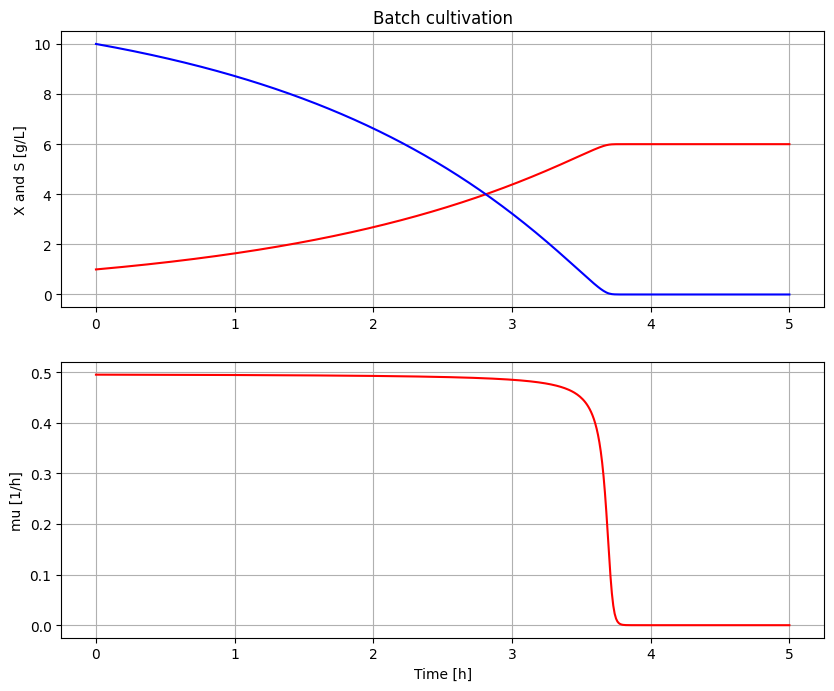

In [10]:
# Simulation with default values of the process
newplot(plotType='TimeSeries')
simu()

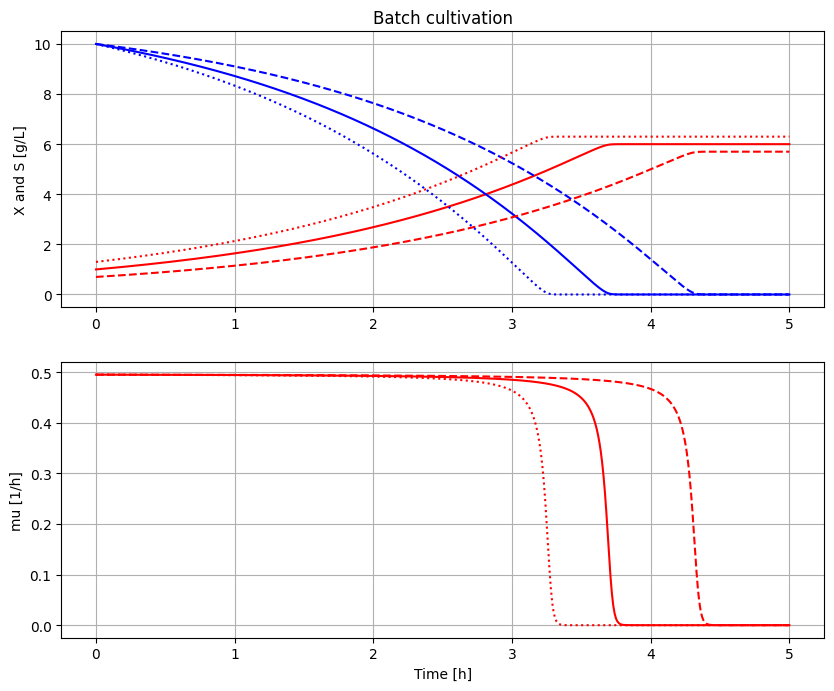

In [11]:
# Simulation were initial value of biomass VX_start is varied
newplot(plotType='TimeSeries')
for value in [1.0, 0.7, 1.3]: init(VX_start=value); simu(5)

# Restore default value of VX_start
init(VX_start=1.0)

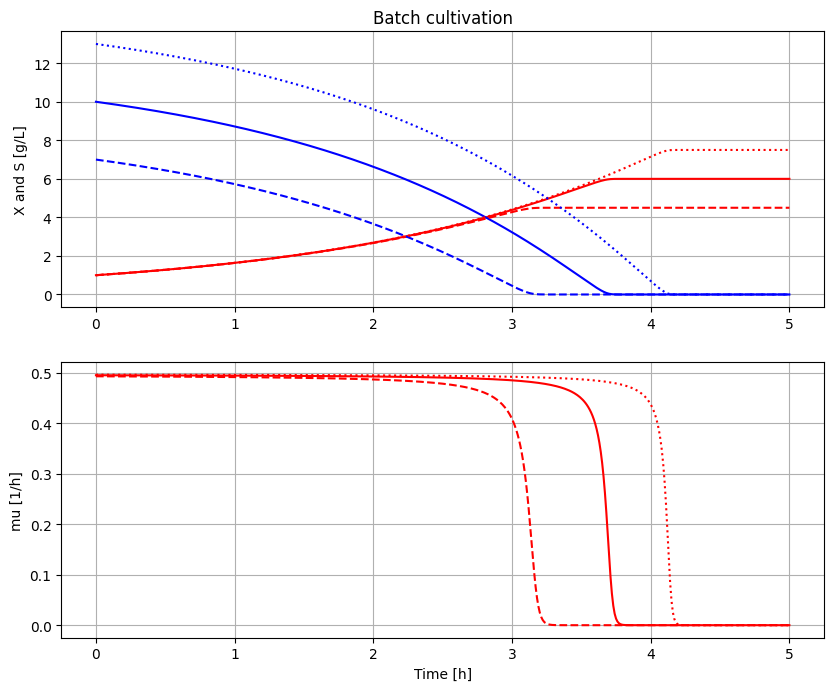

In [12]:
# Simulation were initial value of substrate VS_start is varied
newplot(plotType='TimeSeries')
for value in [10, 7, 13]: init(VS_start=value); simu(5)

# Restore default value of VS_start
init(VS_start=10)

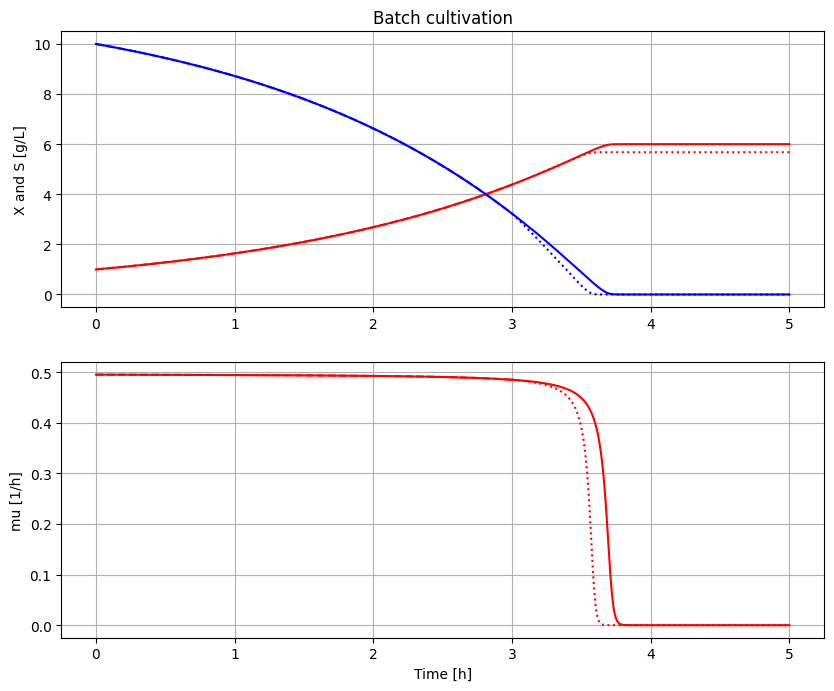

In [13]:
# Simulation where metabolism is changed after 3 hours
newplot(plotType='TimeSeries')
simu(5)

simu(3)
par(Y=0.4, qSmax=1.0/(0.4/0.5)); simu(2, 'cont')

# Restore default value of Y and qSmax
par(Y=0.5, qSmax=1.0)

In [14]:
disp('culture')

Y : 0.4
qSmax : 1.25
Ks : 0.1


In [15]:
# Growth rate variable at the end of the cultivation
describe('mu')

Cell specific growth rate variable : 0.0 [ 1/h ]


In [16]:
describe('parts')

['bioreactor', 'bioreactor.culture']


In [17]:
describe('MSL')

MSL: 4.1.0 - used components: none


In [18]:
system_info()


System information
 -OS: Linux
 -Python: 3.12.12
 -Scipy: not installed in the notebook
 -FMPy: 0.3.26
 -FMU by: OpenModelica Compiler OpenModelica 1.26.0~dev-200-gcb3254b
 -FMI: 2.0
 -Type: ME
 -Name: BPL.Examples_TEST2.Batch
 -Generated: 2025-07-28T07:58:02Z
 -MSL: 4.1.0
 -Description: Bioprocess Library version 2.3.1
 -Interaction: FMU-explore for FMPy version 1.0.2
